In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [572]:
data = pd.read_csv('automobile_data.csv')
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [573]:
data[['normalized-losses','symboling']].loc[data['normalized-losses'] != '?'].corr()

,normalized-losses,symboling
normalized-losses,1.000000,0.528667
symboling,0.528667,1.000000


In [574]:
data.query('price == "?"').index

Index([9, 44, 45, 129], dtype='int64')

In [575]:
data.drop(data.query('price == "?"').index, inplace=True)

In [576]:
clm_null = ['bore', 'horsepower', 'stroke', 'peak-rpm','num-of-doors']
for column in clm_null:
    data[column].replace(to_replace="?", value=data[column].mode()[0], inplace=True)
    print(data[column].mode()[0])

3.62
68
3.4
4800
four


C:\Users\smile\AppData\Local\Temp\ipykernel_29572\3125220476.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].replace(to_replace="?", value=data[column].mode()[0], inplace=True)


In [577]:
without_q = data[data['normalized-losses'] != "?"].copy()
without_q['normalized-losses'] = pd.to_numeric(without_q['normalized-losses'])

for i in range(-2, 4):
    mode_value = without_q.loc[without_q['symboling'] == i, 'normalized-losses'].mode()
    data.loc[(data['symboling'] == i) & (data['normalized-losses'] == "?"), 'normalized-losses'] = mode_value[0]
data['normalized-losses'] =pd.to_numeric(data['normalized-losses'])

In [578]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [579]:
data[['horsepower', 'peak-rpm', 'bore', 'stroke', 'normalized-losses','price']] = data[['horsepower', 'peak-rpm', 'bore', 'stroke', 'normalized-losses','price']].apply(pd.to_numeric, errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   fuel-type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num-of-doors       201 non-null    object 
 6   body-style         201 non-null    object 
 7   drive-wheels       201 non-null    object 
 8   engine-location    201 non-null    object 
 9   wheel-base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb-weight        201 non-null    int64  
 14  engine-type        201 non-null    object 
 15  num-of-cylinders   201 non-null    object 
 16  engine-size        201 non-null

In [580]:
from sklearn.preprocessing import OneHotEncoder
OH_encoder = OneHotEncoder(sparse_output=False)
one_hot_encoder = OH_encoder.fit_transform(data[['make','fuel-type','body-style','drive-wheels','fuel-system','aspiration']])
encoded_data = pd.DataFrame(one_hot_encoder,columns=OH_encoder.get_feature_names_out(['make','fuel-type','body-style','drive-wheels','fuel-system','aspiration']), index=data.index)

newdata = pd.concat([data, encoded_data], axis=1)
newdata.drop(['make','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system','fuel-type'],axis = 1,inplace=True)
newdata


,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,aspiration_std,aspiration_turbo
0,3,150,two,88.6,168.8,64.1,48.8,2548,four,130,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,3,150,two,88.6,168.8,64.1,48.8,2548,four,130,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1,128,two,94.5,171.2,65.5,52.4,2823,six,152,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2,164,four,99.8,176.6,66.2,54.3,2337,four,109,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2,164,four,99.4,176.6,66.4,54.3,2824,five,136,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,four,109.1,188.8,68.9,55.5,2952,four,141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
201,-1,95,four,109.1,188.8,68.8,55.5,3049,four,141,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
202,-1,95,four,109.1,188.8,68.9,55.5,3012,six,173,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
203,-1,95,four,109.1,188.8,68.9,55.5,3217,six,145,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [581]:
newdata['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [582]:
newdata.replace(to_replace=['two','four','six','five','three','twelve', 'eight'], value=[2,4,6,5,3,12,8], inplace=True)

C:\Users\smile\AppData\Local\Temp\ipykernel_29572\2893002715.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newdata.replace(to_replace=['two','four','six','five','three','twelve', 'eight'], value=[2,4,6,5,3,12,8], inplace=True)


In [583]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               201 non-null    int64  
 1   normalized-losses       201 non-null    int64  
 2   num-of-doors            201 non-null    int64  
 3   wheel-base              201 non-null    float64
 4   length                  201 non-null    float64
 5   width                   201 non-null    float64
 6   height                  201 non-null    float64
 7   curb-weight             201 non-null    int64  
 8   num-of-cylinders        201 non-null    int64  
 9   engine-size             201 non-null    int64  
 10  bore                    201 non-null    float64
 11  stroke                  201 non-null    float64
 12  compression-ratio       201 non-null    float64
 13  horsepower              201 non-null    int64  
 14  peak-rpm                201 non-null    int64  

In [584]:
newdata[['bore','price','peak-rpm','horsepower','stroke','symboling','city-mpg','highway-mpg','engine-size','normalized-losses','compression-ratio','length','width','height','curb-weight','num-of-cylinders','wheel-base']].corr()

,bore,price,peak-rpm,horsepower,stroke,symboling,city-mpg,highway-mpg,engine-size,normalized-losses,compression-ratio,length,width,height,curb-weight,num-of-cylinders,wheel-base
bore,1.000000,0.536556,-0.227482,0.557176,-0.045208,-0.101604,-0.603594,-0.608823,0.538161,-0.016110,-0.002837,0.593100,0.536845,0.141977,0.630855,0.152627,0.475366
price,0.536556,1.000000,-0.098308,0.810395,0.081890,-0.082391,-0.686571,-0.704692,0.872335,0.060057,0.071107,0.690628,0.751265,0.135486,0.834415,0.708645,0.584642
peak-rpm,-0.227482,-0.098308,1.000000,0.113361,-0.060211,0.278269,-0.112858,-0.058782,-0.257012,0.282597,-0.432349,-0.288075,-0.247401,-0.306757,-0.278278,-0.149251,-0.356502
horsepower,0.557176,0.810395,0.113361,1.000000,0.079590,0.074259,-0.815311,-0.801471,0.817856,0.192663,-0.210036,0.573384,0.609326,-0.083025,0.755308,0.669064,0.373805
stroke,-0.045208,0.081890,-0.060211,0.079590,1.000000,0.007575,-0.045870,-0.044865,0.193566,0.043290,0.185753,0.119850,0.187622,-0.076083,0.164554,-0.007032,0.152438
symboling,-0.101604,-0.082391,0.278269,0.074259,0.007575,1.000000,-0.035527,0.036233,-0.110581,0.586056,-0.182196,-0.365404,-0.242423,-0.550160,-0.233118,-0.118016,-0.535987
city-mpg,-0.603594,-0.686571,-0.112858,-0.815311,-0.045870,-0.035527,1.000000,0.972044,-0.650546,-0.192374,0.331425,-0.665192,-0.633531,-0.049800,-0.749543,-0.439432,-0.470606
highway-mpg,-0.608823,-0.704692,-0.058782,-0.801471,-0.044865,0.036233,0.972044,1.000000,-0.679571,-0.135381,0.268465,-0.698142,-0.680635,-0.104812,-0.794889,-0.473746,-0.543304
engine-size,0.538161,0.872335,-0.257012,0.817856,0.193566,-0.110581,-0.650546,-0.679571,1.000000,0.031144,0.028889,0.685025,0.729436,0.074694,0.849072,0.847639,0.572027
normalized-losses,-0.016110,0.060057,0.282597,0.192663,0.043290,0.586056,-0.192374,-0.135381,0.031144,1.000000,-0.168776,-0.116469,-0.020577,-0.456919,-0.004840,0.014182,-0.217926


In [585]:
newdata.drop(['peak-rpm','stroke','symboling','normalized-losses','compression-ratio','height','num-of-doors'],axis=1,inplace = True)
data.drop(['peak-rpm','stroke','symboling','normalized-losses','compression-ratio','height','num-of-doors','engine-location','engine-type'],axis=1,inplace = True)
#do not show significant linear correlation so data is not helpful for linear regression model

In [586]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   make              201 non-null    object 
 1   fuel-type         201 non-null    object 
 2   aspiration        201 non-null    object 
 3   body-style        201 non-null    object 
 4   drive-wheels      201 non-null    object 
 5   wheel-base        201 non-null    float64
 6   length            201 non-null    float64
 7   width             201 non-null    float64
 8   curb-weight       201 non-null    int64  
 9   num-of-cylinders  201 non-null    object 
 10  engine-size       201 non-null    int64  
 11  fuel-system       201 non-null    object 
 12  bore              201 non-null    float64
 13  horsepower        201 non-null    int64  
 14  city-mpg          201 non-null    int64  
 15  highway-mpg       201 non-null    int64  
 16  price             201 non-null    int64  
dtypes:

In [587]:
column_to_standardize = list(set(data.columns) - set(['make','aspiration','body-style','drive-wheels','fuel-system','price', 'fuel-type']))
column_to_standardize

['length',
 'width',
 'wheel-base',
 'curb-weight',
 'bore',
 'horsepower',
 'engine-size',
 'num-of-cylinders',
 'highway-mpg',
 'city-mpg']

In [588]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
y = newdata['price']
x = newdata.drop(['price'], axis=1)
x_standard = x.copy()  
x_standard[column_to_standardize] = Scaler.fit_transform(x[column_to_standardize])
x_standard.columns

Index(['wheel-base', 'length', 'width', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg',
       'make_alfa-romero', 'make_audi', 'make_bmw', 'make_chevrolet',
       'make_dodge', 'make_honda', 'make_isuzu', 'make_jaguar', 'make_mazda',
       'make_mercedes-benz', 'make_mercury', 'make_mitsubishi', 'make_nissan',
       'make_peugot', 'make_plymouth', 'make_porsche', 'make_renault',
       'make_saab', 'make_subaru', 'make_toyota', 'make_volkswagen',
       'make_volvo', 'fuel-type_diesel', 'fuel-type_gas',
       'body-style_convertible', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_4wd',
       'drive-wheels_fwd', 'drive-wheels_rwd', 'fuel-system_1bbl',
       'fuel-system_2bbl', 'fuel-system_4bbl', 'fuel-system_idi',
       'fuel-system_mfi', 'fuel-system_mpfi', 'fuel-system_spdi',
       'fuel-system_spfi', 'aspiration_std', 'aspiration_turbo'],
      dtype='objec

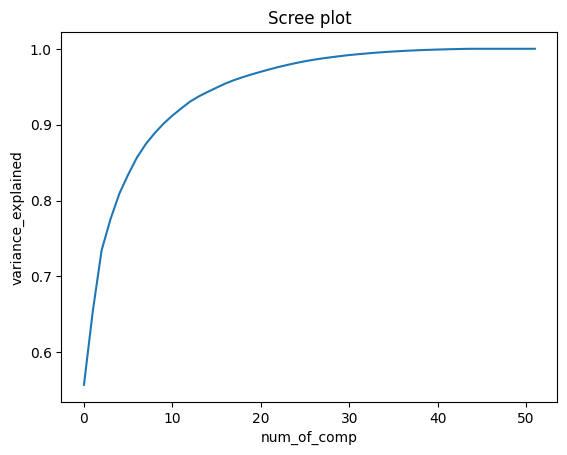

In [589]:
from sklearn.decomposition import PCA
pca = PCA()
prpl_comp_x = pca.fit_transform(x_standard)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('num_of_comp')
plt.ylabel('variance_explained')
plt.title('Scree plot')
plt.show()

In [590]:
exp_var = pca.explained_variance_ratio_
exp_var[:7].sum()

np.float64(0.8745069638639046)

In [591]:
pca = PCA(n_components=7)
x_pca = pca.fit_transform(x_standard)
pca.explained_variance_ratio_.sum()

np.float64(0.8568519980916185)

In [592]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, y,train_size=0.1, random_state=100)

In [593]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [594]:
prediction = model.predict(x_test)

In [595]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score , root_mean_squared_error
mse = mean_squared_error(prediction,y_test)
mae = mean_absolute_error(prediction, y_test)
rmse = root_mean_squared_error(prediction, y_test)
r2 = r2_score(prediction,y_test)
print(f'mean_absolute_error : {mae} , mean_squared_error : {mse} , r2_score : {r2},  root_mean_squared_error : {rmse}')

mean_absolute_error : 2662.9124937122647 , mean_squared_error : 15104506.274343165 , r2_score : 0.6639663944488361,  root_mean_squared_error : 3886.451630259042


In [596]:
pickle.dump([Scaler,OH_encoder,pca,model], open('model.pkl','wb'))